In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [18]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 101.6 MB/s eta 0:00:00


In [2]:
train = pd.read_csv('/content/drive/MyDrive/data/mnist_train.csv_norm.csv')
Xtrain = train.drop(columns=['label'])
Xtrain = Xtrain.values.reshape(-1, 28, 28, 1)
Ytrain = train['label']

test = pd.read_csv('/content/drive/MyDrive/data/mnist_test.csv_norm.csv')
Xtest = test.drop(columns=['label'])
Xtest = Xtest.values.reshape(-1, 28, 28, 1)
Ytest = test['label']

Labels = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
def show_image_from_dataframe(df, index):
    imagen = np.array(df.iloc[index, 1:]).reshape(28, 28)

    plt.imshow(imagen, cmap='gray')
    plt.axis('off')
    plt.show()

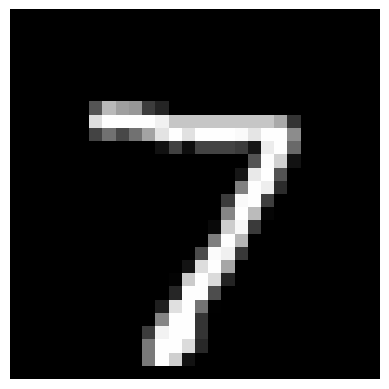

In [ ]:
show_image_from_dataframe(test,0)

In [3]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D (32, (3,3), input_shape=(28,28,1), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D (64, (3,3), input_shape=(28,28,1), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense (100,activation = tf.nn.relu),
    tf.keras.layers.Dense (10,activation = tf.nn.softmax)
])

In [4]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [5]:
import math
history_ = model.fit(Xtrain,Ytrain, epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1718 - accuracy: 0.9472
Epoch 2/25
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0677 - accuracy: 0.9790
Epoch 3/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0523 - accuracy: 0.9834
Epoch 4/25
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0427 - accuracy: 0.9862
Epoch 5/25
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0344 - accuracy: 0.9889
Epoch 6/25
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0306 - accuracy: 0.9899
Epoch 7/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0272 - accuracy: 0.9912
Epoch 8/25
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0266 - accuracy: 0.9918
Epoch 9/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0248 - accuracy: 0.9917
Epoch 10/25
1875/1875 [==============================] - 29s 15m

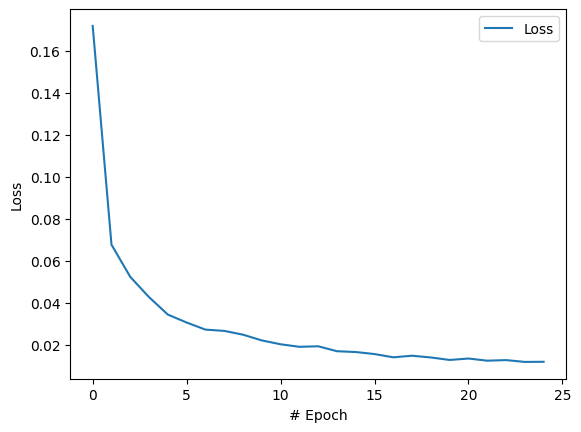

In [6]:
fig, ax = plt.subplots()
ax.plot(history_.history["loss"], label="Loss")
ax.set_xlabel("# Epoch")
ax.set_ylabel("Loss")
ax.legend()
plt.show()

In [7]:
predicts = model.predict(Xtest)

313/313 [==============================] - 2s 5ms/step


In [13]:
def show_image_from_dataframe_with_predict(df, index_):
    imagen = np.array(df.iloc[index_, 1:]).reshape(28, 28)
    ok_number_predict = np.argmax(predicts[index_])
    ok_number_array = df['label'][index_]

    fig = plt.figure(figsize=(10, 5))
    width_ratios = [4, 1]
    gs = fig.add_gridspec(1, 2, width_ratios=width_ratios)

    ax1 = fig.add_subplot(gs[0])
    ax1.imshow(imagen, cmap='gray')
    ax1.axis('off')
    ax1.set_title("Numero")

    color = "green" if ok_number_predict == ok_number_array else "red"

    ax2 = fig.add_subplot(gs[1])
    ax2.set_facecolor(color)

    plt.show()

    print("predict = "+ str(ok_number_predict))
    print("array = "+ str(ok_number_array))

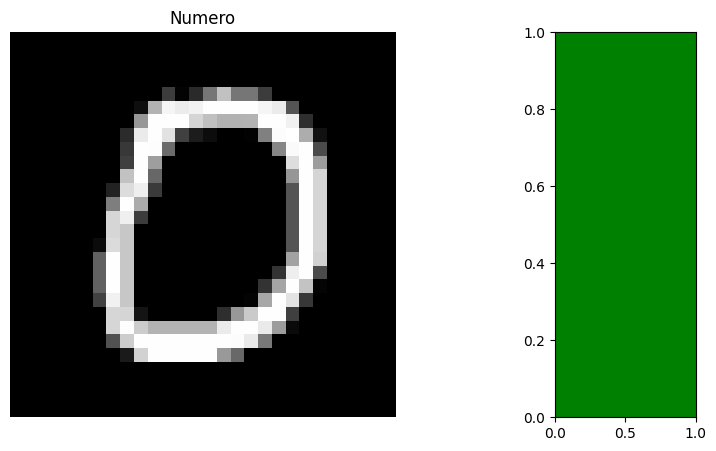

predict = 0
array = 0


In [16]:
show_image_from_dataframe_with_predict(test,10)

In [17]:
model.save("Model_number.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
!mkdir tfjs_target_dir
!tensorflowjs_converter --input_format keras Model_number.h5 tfjs_target_dir

2024-02-03 18:06:35.741912: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 18:06:35.742013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 18:06:35.744544: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 18:06:36.749472: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
